In [67]:
import numpy as np
import pandas as pd
import os

import datetime as DT
from datetime import timedelta
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns

## Donors

In [68]:
path = os.path.abspath('data/donors.csv')
df_donors = pd.read_csv(path)
df_donors.drop('Unnamed: 0', axis = 1, inplace=True)
df_donors['dateOfBirth'] = pd.to_datetime(df_donors["dateOfBirth"],yearfirst=True)
df_donors['year'] = pd.DatetimeIndex(df_donors['dateOfBirth']).year

### Adding an Age column

def from_dob_to_age(born):
    today = DT.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df_donors['age'] = df_donors['dateOfBirth'].apply(lambda x: from_dob_to_age(x))

df_donors.shape


(44691, 9)

In [69]:
df_donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,year,age
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1967,52
1,100002,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1952,68
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,1986-12-23,1986,33
3,100004,1020.0,Brussels,Brussels,F,FR,1952-03-29,1952,68
4,100005,1020.0,Brussels,Brussels,F,FR,1986-06-25,1986,34


The breakdown by age looks like this:

Baby Boomers: Baby boomers were born between 1946 and 1964. They're currently between 56-74 years old (71.6 million in U.S.)

Gen X: Gen X was born between 1965 and 1980 and are currently between 40-55 years old (65.2 million people in U.S.)

Gen Y: Gen Y, or Millennials, were born between 1980 and 1994. They are currently between 24-39 years old (72.1 million in the U.S.)

Gen Y.1 = 25-29 years old (around 31 million people in U.S.)

Gen Y.2 = 29-39 (around 42 million people in U.S.)

Gen Z: Gen Z is the newest generation to be named and were born between 1996 and 2015. They are currently between 5-24 years old (nearly 68 million in U.S.)

## Gifts

In [70]:
path = os.path.abspath('data/gifts.csv')
df_gifts = pd.read_csv(path)
df_gifts.drop('Unnamed: 0', inplace= True, axis=1)
print(df_gifts.shape)


### Replacing format in amount: 
df_gifts['amount'] = [x.replace(',', '.') for x in df_gifts['amount']]
df_gifts['amount'] = df_gifts['amount'].astype(float)

df_gifts.sort_values(by='amount', ascending=True).head(100)


(216594, 4)


,donorID,campaignID,amount,date
152747,123109,2090.0,0.10,2009-05-18
78996,109523,NaN,0.13,2014-10-12
159456,124744,5016.0,0.20,2017-10-31
210571,141801,4144.0,0.20,2015-06-11
114594,115502,4135.0,0.25,2015-02-26
...,...,...,...,...
40776,104493,669.0,0.50,2005-06-14
125459,117553,NaN,0.50,2007-05-24
44464,104921,4685.0,0.50,2017-05-16
87401,110644,1577.0,0.50,2007-10-26


### Gifts removing outliers:

In [71]:
df_gifts.drop(index= [153012,141895], inplace=True)

## Calculating recency

In [72]:
df_gifts.date = pd.to_datetime(df_gifts.date)
df_gifts.dtypes

df_gifts['diff_weeks'] = df_gifts['date'] -  datetime.now()
df_gifts['diff_weeks']=df_gifts['diff_weeks']//np.timedelta64(1,'W')
display(df_gifts)

df_gifts['diff_days'] = df_gifts['date'] -  pd.to_datetime("now")
df_gifts['diff_days']=df_gifts['diff_days']//np.timedelta64(1,'D')
display(df_gifts)

now = datetime.now()
df_gifts['diff_years'] = df_gifts['date'] -  now
df_gifts['diff_years']=df_gifts['diff_years']//np.timedelta64(1,'Y')
display(df_gifts)

df_gifts.drop(['diff_weeks', 'diff_years'], axis=1, inplace=True)
df_gifts

df_gifts.rename(columns = {'diff_days':'recency'}, inplace = True)
df_gifts.sort_values('amount', ascending=False)[:10]

,donorID,campaignID,amount,date,diff_weeks
0,100001,NaN,12.39,2004-03-23,-860
1,100001,1577.0,12.39,2007-10-11,-675
2,100001,1634.0,6.69,2007-12-28,-663
3,100001,1778.0,24.79,2008-06-14,-639
4,100001,1808.0,7.44,2008-07-09,-636
...,...,...,...,...,...
216589,265584,6169.0,300.00,2018-09-23,-103
216590,281770,6169.0,30.00,2018-09-08,-105
216591,317880,6169.0,157.50,2018-09-12,-105
216592,480980,6169.0,36.00,2018-09-12,-105


,donorID,campaignID,amount,date,diff_weeks,diff_days
0,100001,NaN,12.39,2004-03-23,-860,-6016
1,100001,1577.0,12.39,2007-10-11,-675,-4719
2,100001,1634.0,6.69,2007-12-28,-663,-4641
3,100001,1778.0,24.79,2008-06-14,-639,-4472
4,100001,1808.0,7.44,2008-07-09,-636,-4447
...,...,...,...,...,...,...
216589,265584,6169.0,300.00,2018-09-23,-103,-719
216590,281770,6169.0,30.00,2018-09-08,-105,-734
216591,317880,6169.0,157.50,2018-09-12,-105,-730
216592,480980,6169.0,36.00,2018-09-12,-105,-730


,donorID,campaignID,amount,date,diff_weeks,diff_days,diff_years
0,100001,NaN,12.39,2004-03-23,-860,-6016,-17
1,100001,1577.0,12.39,2007-10-11,-675,-4719,-13
2,100001,1634.0,6.69,2007-12-28,-663,-4641,-13
3,100001,1778.0,24.79,2008-06-14,-639,-4472,-13
4,100001,1808.0,7.44,2008-07-09,-636,-4447,-13
...,...,...,...,...,...,...,...
216589,265584,6169.0,300.00,2018-09-23,-103,-719,-2
216590,281770,6169.0,30.00,2018-09-08,-105,-734,-3
216591,317880,6169.0,157.50,2018-09-12,-105,-730,-2
216592,480980,6169.0,36.00,2018-09-12,-105,-730,-2


,donorID,campaignID,amount,date,recency
150654,122679,2417.0,30000.00,2010-07-04,-3722
182959,130966,1377.0,12394.68,2007-04-21,-4892
21410,102552,3785.0,5000.00,2014-05-03,-2323
172833,128065,NaN,4000.00,2010-03-12,-3836
53184,105960,NaN,3718.40,2004-11-16,-5778
184130,131307,NaN,3600.00,2012-11-12,-2860
210918,142006,NaN,3198.00,2016-02-10,-1675
154249,123458,2646.0,2500.00,2011-01-22,-3520
79838,109635,NaN,2500.00,2008-09-09,-4385
191187,133448,3184.0,2500.00,2012-04-17,-3069


In [73]:
### Frequency of contributions by ID and total amount contributed: 

df_gifts_freq = df_gifts[['donorID','amount']].groupby('donorID', as_index=False).count()
df_gifts_total = df_gifts[['donorID','amount','recency']].groupby('donorID', as_index=False).sum()

df_gifts_freq = df_gifts_freq.rename(columns={'amount': 'freq'})
df_gifts_freq = df_gifts_freq.drop('donorID', axis=1)


df_gifts_results = pd.concat([df_gifts_total, df_gifts_freq], axis=1)
print(df_gifts_results.shape)
df_gifts_results.head()

(44699, 4)


,donorID,amount,recency,freq
0,100001,178.49,-50273,12
1,100002,20.00,-2071,1
2,100003,46.00,-9033,12
3,100004,716.22,-118787,26
4,100005,24.96,-12887,5


In [74]:
df = df_donors.groupby(['donorID','zipcode','gender','language'], as_index=False).sum()
df

,donorID,zipcode,gender,language,year,age
0,100001,1861.0,F,NL,1967,52
1,100002,2260.0,M,NL,1952,68
2,100003,1780.0,M,NL,1986,33
3,100004,1020.0,F,FR,1952,68
4,100005,1020.0,F,FR,1986,34
...,...,...,...,...,...,...
44652,144687,4900.0,M,FR,1970,49
44653,144688,3600.0,M,NL,1972,47
44654,144689,3061.0,M,NL,1967,53
44655,144690,1950.0,M,FR,1976,44


## Donors and Gifts merged.

In [75]:
df_donors = pd.merge(df, df_gifts_results, on='donorID', how= 'outer')

df_donors.sort_values('freq', ascending=False).head()

,donorID,zipcode,gender,language,year,age,amount,recency,freq
17535,117553,8200.0,M,NL,1963.0,56.0,147.84,-1077625.0,238.0
1974,101982,3990.0,F,NL,1962.0,58.0,724.45,-761676.0,235.0
5944,105959,9070.0,M,NL,1985.0,35.0,2156.92,-974882.0,228.0
2141,102150,3803.0,M,NL,1932.0,88.0,600.60,-799729.0,225.0
7418,107433,8000.0,M,NL,1975.0,45.0,1040.11,-1103180.0,220.0


In [76]:
df_donors.sort_values('freq', ascending=False).tail()

,donorID,zipcode,gender,language,year,age,amount,recency,freq
2013,102021,3600.0,M,NL,1972.0,48.0,NaN,NaN,NaN
4116,104130,1702.0,F,NL,1968.0,52.0,NaN,NaN,NaN
9547,109562,1755.0,M,NL,1958.0,62.0,NaN,NaN,NaN
20843,120861,9050.0,M,NL,1972.0,48.0,NaN,NaN,NaN
26840,126862,1800.0,F,NL,1940.0,80.0,NaN,NaN,NaN


In [77]:
### Null values after merging: 

df_donors.isna().sum()

donorID      0
zipcode     48
gender      48
language    48
year        48
age         48
amount       6
recency      6
freq         6
dtype: int64

In [78]:
df_donors.dropna(axis=0, how='any',inplace=True)

In [79]:
### Null values after merging: 

df_donors.isna().sum()

donorID     0
zipcode     0
gender      0
language    0
year        0
age         0
amount      0
recency     0
freq        0
dtype: int64

In [80]:
df_donors.shape

(44651, 9)

###  Classification by contributed amount

In [81]:
# def label (row):
#     if row <= 100 :
#         return 'Class_1'
#     elif 100 < row <= 1000 :
#         return 'Class_2'
#     elif 1000 < row <= 2000:
#         return 'Class_3'
#     elif 2000 < row <= 3000:
#         return 'Class_4'
#     elif 3000 < row <= 5000:
#         return 'Class_5'
#     elif row > 5000:
#         return 'Class_6'
#     return 'Other'

def label (row):
    if row <= 10 :
        return 0
    elif row > 10:
        return 1

df_donors['amount_class'] = df_donors['amount'].apply (lambda row: label(row))
df_donors

,donorID,zipcode,gender,language,year,age,amount,recency,freq,amount_class
0,100001,1861.0,F,NL,1967.0,52.0,178.49,-50273.0,12.0,1
1,100002,2260.0,M,NL,1952.0,68.0,20.00,-2071.0,1.0,1
2,100003,1780.0,M,NL,1986.0,33.0,46.00,-9033.0,12.0,1
3,100004,1020.0,F,FR,1952.0,68.0,716.22,-118787.0,26.0,1
4,100005,1020.0,F,FR,1986.0,34.0,24.96,-12887.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...
44652,144687,4900.0,M,FR,1970.0,49.0,10.00,-1771.0,1.0,0
44653,144688,3600.0,M,NL,1972.0,47.0,48.56,-26901.0,7.0,1
44654,144689,3061.0,M,NL,1967.0,53.0,424.79,-7118.0,4.0,1
44655,144690,1950.0,M,FR,1976.0,44.0,40.00,-2082.0,1.0,1


In [82]:
df_donors.shape

(44651, 10)

In [83]:
df_donors.sort_values(by='amount', ascending=False).head(10)

,donorID,zipcode,gender,language,year,age,amount,recency,freq,amount_class
22660,122679,3360.0,M,NL,1945.0,75.0,30120.00,-13889.0,4.0,1
5945,105960,2290.0,M,NL,1940.0,80.0,13830.37,-320885.0,120.0,1
9620,109635,9100.0,F,NL,1968.0,51.0,13718.40,-32131.0,7.0,1
30934,130966,2930.0,M,NL,1956.0,63.0,12394.68,-4892.0,1.0,1
7103,107118,2140.0,M,NL,1978.0,41.0,10293.26,-142458.0,42.0,1
36771,136803,8210.0,M,NL,1984.0,35.0,9697.81,-30248.0,10.0,1
5147,105162,8580.0,M,NL,1936.0,83.0,8759.25,-119272.0,26.0,1
4436,104450,9960.0,M,NL,1974.0,45.0,7001.14,-355712.0,98.0,1
6308,106323,9100.0,F,NL,1991.0,29.0,6778.78,-86540.0,22.0,1
1578,101586,3001.0,F,NL,1983.0,37.0,6634.21,-119630.0,34.0,1


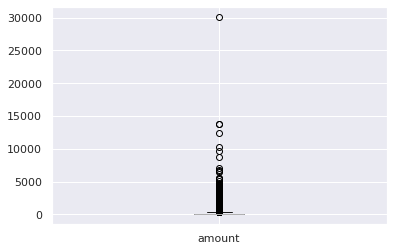

In [84]:
df_donors[['amount']].boxplot()

### Classification by generation

In [85]:
boomers_donors = df_donors.loc[df_donors['year'] <= 1964]

genx_donors = df_donors.loc[df_donors['year'] <= 1980]
genx_donors = genx_donors.loc[genx_donors['year'] >= 1965]

geny_donors = df_donors.loc[df_donors['year'] <= 1995]  ### Small modification
geny_donors = geny_donors.loc[geny_donors['year'] >= 1981]

genz_donors = df_donors.loc[df_donors['year'] < 2015]
genz_donors = genz_donors.loc[genz_donors['year'] >= 1996]

boomers_list = boomers_donors['donorID'].tolist()
genx_list = genx_donors['donorID'].tolist()
geny_list = geny_donors['donorID'].tolist()
genz_list = genz_donors['donorID'].tolist()

df_donors.loc[df_donors['donorID'].isin(boomers_list), 'generation'] = 'Boomer'
df_donors.loc[df_donors['donorID'].isin(genx_list), 'generation'] = 'genX'
df_donors.loc[df_donors['donorID'].isin(geny_list), 'generation'] = 'genY'
df_donors.loc[df_donors['donorID'].isin(genz_list), 'generation'] = 'genZ'

In [86]:
df_donors['mean_amount'] = df_donors['amount'] / df_donors['freq']

## Table 1

In [87]:
df_donors.head()

,donorID,zipcode,gender,language,year,age,amount,recency,freq,amount_class,generation,mean_amount
0,100001,1861.0,F,NL,1967.0,52.0,178.49,-50273.0,12.0,1,genX,14.874167
1,100002,2260.0,M,NL,1952.0,68.0,20.00,-2071.0,1.0,1,Boomer,20.000000
2,100003,1780.0,M,NL,1986.0,33.0,46.00,-9033.0,12.0,1,genY,3.833333
3,100004,1020.0,F,FR,1952.0,68.0,716.22,-118787.0,26.0,1,Boomer,27.546923
4,100005,1020.0,F,FR,1986.0,34.0,24.96,-12887.0,5.0,1,genY,4.992000


In [88]:
# df_donors.to_csv('df_donors_table1.csv')
df_donors.shape

(44651, 12)

## Plots for generations

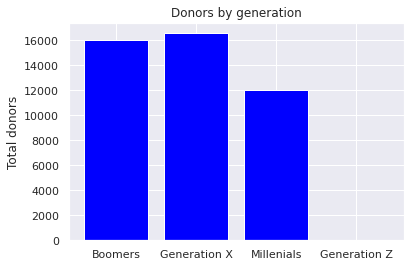

In [89]:
donors_by_gen = [boomers_donors['donorID'].count(),
                genx_donors['donorID'].count(),
                geny_donors['donorID'].count(),
                genz_donors['donorID'].count()]

x = ['Boomers', 'Generation X', 'Millenials', 'Generation Z']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, donors_by_gen, color='blue')
plt.xlabel("")
plt.ylabel("Total donors")
plt.title("Donors by generation")

plt.xticks(x_pos, x)

plt.show()

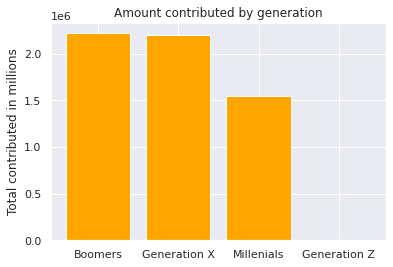

[16043, 16583, 12024, 1]


In [90]:
amount_by_gen = [boomers_donors['amount'].sum(),
                genx_donors['amount'].sum(),
                geny_donors['amount'].sum(),
                genz_donors['amount'].sum()]

x = ['Boomers', 'Generation X', 'Millenials', 'Generation Z']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, amount_by_gen, color='orange')
plt.xlabel("")
plt.ylabel("Total contributed in millions")
plt.title("Amount contributed by generation")

plt.xticks(x_pos, x)

plt.show()
print(donors_by_gen)



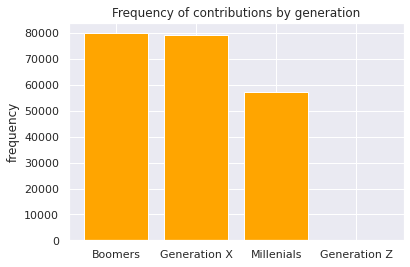

[16043, 16583, 12024, 1]


In [91]:
freq_by_gen = [boomers_donors['freq'].sum(),
                genx_donors['freq'].sum(),
                geny_donors['freq'].sum(),
                genz_donors['freq'].sum()]

x = ['Boomers', 'Generation X', 'Millenials', 'Generation Z']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, freq_by_gen, color='orange')
plt.xlabel("")
plt.ylabel("frequency")
plt.title("Frequency of contributions by generation")

plt.xticks(x_pos, x)

plt.show()
print(donors_by_gen)

## Campaigns

In [92]:
path = os.path.abspath('data/campaigns.csv')
df_campaigns = pd.read_csv(path, sep = ";")
df_campaigns.shape

path_letter = os.path.abspath('data/lettersSent.csv')
df_letter = pd.read_csv(path_letter)

df_campaigns.head()

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [93]:
df_campaigns.sort_values(by= 'CostUnit', ascending= False).head()

,campaignID,date,lettersSent,CostUnit
335,6169,04/09/2018,34 888,"0,87 €"
357,7335,05/08/2019,5 983,"0,69 €"
183,3189,16/06/2012,38 672,"0,61 €"
85,1843,07/07/2008,38 921,"0,61 €"
202,3448,11/04/2013,39 295,"0,61 €"


In [94]:
df_campaigns.sort_values(by= 'CostUnit').head()

,campaignID,date,lettersSent,CostUnit
14,723,09/07/2005,22 810,"0,00 €"
244,3930,07/12/2014,36 766,"0,00 €"
360,7395,18/09/2019,38 629,"0,01 €"
356,7330,17/07/2019,5 391,"0,02 €"
266,4211,01/11/2015,9 938,"0,02 €"


####???? Some campaigns has zero cost. Is that ok?

In [95]:
df_campaigns.drop('lettersSent', axis=1, inplace=True)
df_campaigns.head(5).sort_values(by='campaignID', ascending=False)

### Adding LettersSent in type=int64
df_campaigns = df_campaigns.merge(df_letter, how= 'inner')

In [96]:
### Replacing format in CostUnit: 

df_campaigns['CostUnit'] = [x.replace(',', '.') for x in df_campaigns['CostUnit']]
df_campaigns['CostUnit'] = [x.replace('€', '') for x in df_campaigns['CostUnit']]

df_campaigns['CostUnit'] = df_campaigns['CostUnit'].astype(float)



In [97]:
df_campaigns['total_expense'] = df_campaigns['CostUnit'] * df_campaigns ['lettersSent']
df_campaigns.head()

,campaignID,date,CostUnit,lettersSent,total_expense
0,153,13/12/2004,0.17,6873,1168.41
1,180,18/01/2005,0.20,9933,1986.60
2,433,29/01/2005,0.59,7448,4394.32
3,498,22/02/2005,0.20,5441,1088.20
4,574,29/03/2005,0.40,8986,3594.40


## Campaigns merged with Gifts

In [98]:
df_campaigns_donors = pd.merge(df_campaigns, df_gifts, on= 'campaignID', how='outer', indicator=True)

df_campaigns_donors.sort_values(by='donorID').head()

,campaignID,date_x,CostUnit,lettersSent,total_expense,donorID,amount,date_y,recency,_merge
40032,2094.0,18/05/2009,0.41,32506.0,13327.46,100001,30.00,2009-05-25,-4127,both
23159,1778.0,25/05/2008,0.41,30558.0,12528.78,100001,24.79,2008-06-14,-4472,both
65354,2714.0,28/05/2011,0.51,45588.0,23249.88,100001,10.00,2011-06-02,-3389,both
122148,NaN,NaN,NaN,NaN,NaN,100001,12.39,2004-03-23,-6016,right_only
138575,1634.0,NaN,NaN,NaN,NaN,100001,6.69,2007-12-28,-4641,right_only


In [99]:
df_campaigns_donors = df_campaigns_donors.drop(['date_x','CostUnit','lettersSent','date_y','_merge'], axis=1)

## Table 2: CampaignID and its donors

In [100]:
df_campaigns_donors.head()

,campaignID,total_expense,donorID,amount,recency
0,153.0,1168.41,104748,24.79,-5738
1,153.0,1168.41,106068,30.00,-5732
2,153.0,1168.41,118588,30.00,-5731
3,153.0,1168.41,120234,12.39,-5746
4,153.0,1168.41,124978,2.50,-5732


## Return on investment ROI by campaign

***ROI= (Current Value of Investment−Cost of Investment) / Cost of Investment***

In [101]:
total_invest = df_campaigns_donors.groupby(['campaignID','total_expense'], as_index=False)[['amount']].sum()
total_invest['ROI'] = 100*(total_invest['amount'] - total_invest['total_expense']) / total_invest['total_expense']

### Order by ROI:

total_invest.sort_values(by= 'ROI', ascending=False).head()

,campaignID,total_expense,amount,ROI
219,7395.0,386.29,10023.000,2494.682751
127,3542.0,104.72,1383.100,1220.760122
217,7330.0,107.82,1416.500,1213.763680
104,3049.0,4256.40,52359.532,1130.136547
215,7229.0,2334.84,18813.050,705.753285


In [102]:
### Order by amount:

total_invest.sort_values(by= 'amount', ascending=False).head()

,campaignID,total_expense,amount,ROI
104,3049.0,4256.40,52359.5320,1130.136547
111,3189.0,23589.92,52049.2000,120.641698
58,1933.0,6978.00,49525.0158,609.730808
95,2802.0,14841.25,49208.5300,231.565940
94,2714.0,23249.88,46378.1720,99.477038


In [103]:
possi_roi = total_invest.loc[total_invest['ROI'] >= 10]
neg_roi = total_invest.loc[total_invest['ROI'] <= 0]

In [104]:
possi_roi.count()

campaignID       170
total_expense    170
amount           170
ROI              170
dtype: int64

### Possitive ROI (>10%)

In [105]:
possi_roi.sort_values(by='ROI', ascending=False)

,campaignID,total_expense,amount,ROI
219,7395.0,386.29,10023.000,2494.682751
127,3542.0,104.72,1383.100,1220.760122
217,7330.0,107.82,1416.500,1213.763680
104,3049.0,4256.40,52359.532,1130.136547
215,7229.0,2334.84,18813.050,705.753285
...,...,...,...,...
12,858.0,9907.91,10968.056,10.699996
75,2263.0,14630.85,16176.930,10.567260
120,3441.0,21074.28,23273.740,10.436703
148,3941.0,18916.50,20876.790,10.362858


### Negative ROI (<= 0%)

In [106]:
neg_roi.count()

campaignID       43
total_expense    43
amount           43
ROI              43
dtype: int64

## ROI Plots

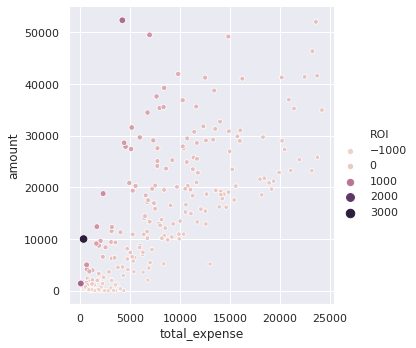

In [107]:
import seaborn as sns
sns.set()

sns.relplot(x="total_expense", y="amount",hue='ROI',
            size='ROI',
            data= total_invest, alpha=1)

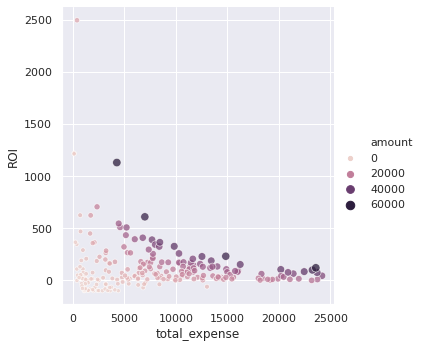

In [108]:
import seaborn as sns
sns.set()

sns.relplot(x="total_expense", y="ROI",hue='amount',
            size='amount',
            data= total_invest, alpha=.75)

***There are some outliers campaigns with high ROI and zero or low investment. Is that correct in the data?***

### ROI considered by donor:  Is this information helpfull???

In [109]:
### ROI by donor:

roi_by_donor = df_campaigns_donors.groupby(['campaignID','donorID','recency','total_expense'], as_index=False)[['amount']].sum()

roi_by_donor['ROI'] = 100*(roi_by_donor['amount'] - roi_by_donor['total_expense']) / roi_by_donor['total_expense']
roi_by_donor.sort_values(by= 'recency', ascending=False).head()

,campaignID,donorID,recency,total_expense,amount,ROI
120436,7536.0,110294,-251,13015.45,75.0,-99.423762
120468,7536.0,136167,-251,13015.45,50.0,-99.615841
120423,7536.0,104504,-251,13015.45,44.0,-99.661940
120426,7536.0,104794,-251,13015.45,60.0,-99.539009
120444,7536.0,120129,-251,13015.45,40.0,-99.692673


## Campaigns with possitive ROI and related donors:

In [110]:
df_campaigns_donors.head()

,campaignID,total_expense,donorID,amount,recency
0,153.0,1168.41,104748,24.79,-5738
1,153.0,1168.41,106068,30.00,-5732
2,153.0,1168.41,118588,30.00,-5731
3,153.0,1168.41,120234,12.39,-5746
4,153.0,1168.41,124978,2.50,-5732


In [111]:
df_campaigns_donors.shape

(216592, 5)

In [112]:
donors_in_pos_campaign = possi_roi.merge(df_campaigns_donors, how='inner', on='campaignID')
display(donors_in_pos_campaign.head())
donors_in_pos_campaign.drop(['total_expense_x','amount_x','total_expense_y','amount_y'],axis=1, inplace=True)


,campaignID,total_expense_x,amount_x,ROI,total_expense_y,donorID,amount_y,recency
0,711.0,359.52,1607.6,347.151758,359.52,100004,24.79,-5550
1,711.0,359.52,1607.6,347.151758,359.52,100058,9.92,-5548
2,711.0,359.52,1607.6,347.151758,359.52,100271,12.39,-5545
3,711.0,359.52,1607.6,347.151758,359.52,100300,12.39,-5536
4,711.0,359.52,1607.6,347.151758,359.52,100302,24.79,-5535


In [113]:
### Donors related to successfull campaigns:
len(donors_in_pos_campaign['donorID'].value_counts())

34105

## Table 3: Donors related with possitive campaigns

In [114]:
donors_in_pos_campaign.head()

,campaignID,ROI,donorID,recency
0,711.0,347.151758,100004,-5550
1,711.0,347.151758,100058,-5548
2,711.0,347.151758,100271,-5545
3,711.0,347.151758,100300,-5536
4,711.0,347.151758,100302,-5535


## Campaigns with negative ROI and related donors

In [115]:
### Donors related to fail campaigns:
donors_in_neg_campaign = neg_roi.merge(df_campaigns_donors, how='inner', on='campaignID')
display(donors_in_neg_campaign.head())
donors_in_neg_campaign.drop(['total_expense_x','amount_x','total_expense_y','amount_y'],axis=1, inplace=True)


,campaignID,total_expense_x,amount_x,ROI,total_expense_y,donorID,amount_y,recency
0,153.0,1168.41,138.68,-88.130879,1168.41,104748,24.79,-5738
1,153.0,1168.41,138.68,-88.130879,1168.41,106068,30.00,-5732
2,153.0,1168.41,138.68,-88.130879,1168.41,118588,30.00,-5731
3,153.0,1168.41,138.68,-88.130879,1168.41,120234,12.39,-5746
4,153.0,1168.41,138.68,-88.130879,1168.41,124978,2.50,-5732


In [116]:
len(donors_in_neg_campaign['donorID'].value_counts())

1935

## Table 4: Donors related to failed campaigns

In [117]:
donors_in_neg_campaign.head()

,campaignID,ROI,donorID,recency
0,153.0,-88.130879,104748,-5738
1,153.0,-88.130879,106068,-5732
2,153.0,-88.130879,118588,-5731
3,153.0,-88.130879,120234,-5746
4,153.0,-88.130879,124978,-5732


## Donors in common for possitive and negative campaigns:

In [118]:
common_donnors = donors_in_pos_campaign.merge(donors_in_neg_campaign, how='inner', on= 'donorID')

In [119]:
len(common_donnors)

21654

### Donors from success campaign also present in failed camapigns. CHECK THIS IS NOT READY

In [120]:
donors_in_pos_campaign[~donors_in_pos_campaign.isin(
    donors_in_neg_campaign)].dropna().groupby('donorID', as_index= False).mean()

,donorID,campaignID,ROI,recency
0,100001,2282.625000,332.821319,-3923.8750
1,100002,3941.000000,10.362858,-2071.0000
2,100003,6369.857143,172.662542,-713.0000
3,100004,1614.562500,178.117156,-4635.1875
4,100005,2856.000000,56.595013,-3252.0000
...,...,...,...,...
34100,144687,4210.000000,321.590918,-1771.0000
34101,144688,2797.250000,190.913044,-3362.7500
34102,144689,5166.000000,279.187511,-2103.0000
34103,144690,3941.000000,10.362858,-2082.0000


In [121]:
donors_in_neg_campaign[~donors_in_neg_campaign.isin(
    donors_in_pos_campaign)].dropna().groupby('donorID', as_index= False).mean()

,donorID,campaignID,ROI,recency
0,100015,4223.0,-14.652675,-1596.0
1,100019,4223.0,-14.652675,-1584.0
2,100034,6170.0,-68.050582,-723.0
3,100094,3812.0,-13.835215,-2206.0
4,100097,1235.0,-0.642440,-5058.0
...,...,...,...,...
1930,144614,7064.0,-95.261947,-563.0
1931,144620,6547.0,-81.856527,-686.5
1932,144625,4019.0,-18.475632,-1879.0
1933,144640,4679.0,-36.239282,-1295.0


## Campaign 6169

In [122]:
path = os.path.abspath('data/selection campaign 6169.csv')
df_6169 = pd.read_csv(path, sep = ";")
df_6169.shape

(34888, 1)

In [123]:
df_6169.head()

,donorID
0,100001
1,100002
2,100004
3,100008
4,100009


In [124]:
donors_6169 = df_6169.merge(df_donors, how='inner', on= 'donorID')
donors_6169.shape

(34846, 12)

In [125]:
donors_6169.isna().sum()

donorID         0
zipcode         0
gender          0
language        0
year            0
age             0
amount          0
recency         0
freq            0
amount_class    0
generation      0
mean_amount     0
dtype: int64

In [126]:
donors_6169.to_csv('donors_in_campaign_6169.csv')

## Campaign 7244

In [127]:
path = os.path.abspath('data/selection campaign 7244.csv')
df_7244 = pd.read_csv(path, sep = ";")
df_7244.shape

(25645, 1)

In [128]:
df_7244.head()

,donorID
0,100001
1,100002
2,100008
3,100009
4,100010


In [129]:
donors_7244 = df_7244.merge(df_donors, how='inner', on= 'donorID')


In [130]:
donors_7244

,donorID,zipcode,gender,language,year,age,amount,recency,freq,amount_class,generation,mean_amount
0,100001,1861.0,F,NL,1967.0,52.0,178.49,-50273.0,12.0,1,genX,14.874167
1,100002,2260.0,M,NL,1952.0,68.0,20.00,-2071.0,1.0,1,Boomer,20.000000
2,100008,1780.0,M,FR,1937.0,83.0,124.37,-12760.0,3.0,1,Boomer,41.456667
3,100009,1020.0,M,FR,1932.0,88.0,326.78,-77210.0,19.0,1,Boomer,17.198947
4,100010,1020.0,M,FR,1983.0,37.0,40.00,-2068.0,1.0,1,genY,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
25626,144681,6110.0,M,FR,1954.0,66.0,30.00,-1778.0,1.0,1,Boomer,30.000000
25627,144682,1640.0,M,FR,1982.0,38.0,40.00,-1493.0,1.0,1,genY,40.000000
25628,144686,2440.0,F,NL,1964.0,55.0,50.00,-1963.0,1.0,1,Boomer,50.000000
25629,144690,1950.0,M,FR,1976.0,44.0,40.00,-2082.0,1.0,1,genX,40.000000


In [131]:
donors_7244.shape

(25631, 12)

In [132]:
donors_7244.isna().sum()

donorID         0
zipcode         0
gender          0
language        0
year            0
age             0
amount          0
recency         0
freq            0
amount_class    0
generation      0
mean_amount     0
dtype: int64

In [133]:
donors_7244.to_csv('donors_in_campaign_7244.csv')